**Хоружий Кирилл, Б02-929, B1**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Задача 1

## Подготовка

In [378]:
NUM_MIN = -2
NUM_MAX = 2

def get_rand_mat(size=None): 
    return np.random.uniform(NUM_MIN, NUM_MAX, size)

# генерация случайной матрицы nxm
n = 2
m = 3
get_rand_mat([n, m])

array([[ 0.85353073,  1.75912863,  0.41351368],
       [-0.74854659,  1.55308446, -1.51655702]])

In [379]:
def get_diag_mat(n):
    mat = np.zeros([n, n])
    np.fill_diagonal(mat, get_rand_mat(n))
    return mat

# генерация случайной диагональной матрицы
get_diag_mat(3)

array([[ 1.49594858,  0.        ,  0.        ],
       [ 0.        ,  0.71923579,  0.        ],
       [ 0.        ,  0.        , -0.02780812]])

In [380]:
# генерация верхнетреугольной матрицы
np.triu(get_rand_mat([3, 3]))

array([[ 1.23274267,  0.64307845, -0.16997759],
       [ 0.        ,  1.49747169, -0.08649943],
       [ 0.        ,  0.        , -1.1711994 ]])

In [381]:
# генерация нижнетреугольной матрицы
np.triu(get_rand_mat([3, 3])).T

array([[-0.54918168,  0.        ,  0.        ],
       [ 1.64900868,  0.52153374,  0.        ],
       [-0.79484321,  1.96727503,  0.2883335 ]])

In [382]:
def get_sym_mat(n):
    mat = get_rand_mat([n, n])
    return (mat.T+mat)/2

# генерация симметричной матрицы в том же диапазоне
get_sym_mat(3)

array([[ 1.14116099, -0.27879551,  1.4332207 ],
       [-0.27879551, -1.60213981, -0.58792943],
       [ 1.4332207 , -0.58792943, -0.24798242]])

In [383]:
def get_degen_mat(size):
    mat = get_rand_mat(size)
    mat[1] = mat[0] #повторим строку для вырождения
    return mat

# генерация вырожденной матрицы
get_degen_mat([3, 3])

array([[ 0.96140521,  0.58862574,  0.91913998],
       [ 0.96140521,  0.58862574,  0.91913998],
       [ 1.79965585, -0.90061811, -0.72103369]])

In [384]:
def get_lad_mat(n, m):
    mat = np.triu(get_rand_mat([n, n]))
    mat[m:]=0
    return mat

# генерация матрицы ступенчатого вида nxn ранга m
get_lad_mat(3, 2)

array([[ 0.15981602, -0.92917506,  0.7402165 ],
       [ 0.        ,  1.03200107,  1.2414612 ],
       [ 0.        ,  0.        ,  0.        ]])

In [385]:
def get_pert_mat(size, epsilon):
    return np.random.uniform(-epsilon, epsilon, size)

# генерация возмущения матрицы
get_pert_mat([2,3], 0.1)

array([[-0.01569066, -0.09625996,  0.02988501],
       [-0.07056013,  0.07659676, -0.00616344]])

## Реализация

In [373]:
class mat_gen:
    
    # при инициализации класса задаем разброс значений для матрциы
    def __init__(self, NUM_MIN, NUM_MAX):
        self.NUM_MIN = NUM_MIN
        self.NUM_MAX = NUM_MAX
       

    # генерация случайной матрицы nxm
    def rand(self, size=None): 
        return np.random.uniform(NUM_MIN, NUM_MAX, size)
    
    
    # генерация случайной диагональной матрицы
    def diag(self, n):
        mat = np.zeros([n, n])
        np.fill_diagonal(mat, get_rand_mat(n))
        return mat

    
    # генерация верхнетреугольной матрицы
    def uptriu(self, n):
        return np.triu(get_rand_mat([n, n]))
    
    
    # генерация нижнетреугольной матрицы
    def downtriu(self, n):
        return np.triu(get_rand_mat([n, n])).T
    
    # генерация симметричной матрицы
    def sym(self, n):
        mat = get_rand_mat([n, n])
        return (mat.T+mat)/2
    
    
    # генерация вырожденной матрицы
    def degen(self, size):
        mat = get_rand_mat(size)
        mat[1] = mat[0] #повторим строку для вырождения
        return mat
    
    
    # генерация матрицы ступенчатого вида nxn ранга m
    def lad(self, n, m):
        mat = np.triu(get_rand_mat([n, n]))
        mat[m:]=0
        return mat
    
    
    # генерация возмущения матрицы
    def pert(self, size, epsilon):
        return np.random.uniform(-epsilon, epsilon, size)

## Тест

In [118]:
# создаем объект класс
gen = mat_gen(-2, 2)

In [120]:
gen.rand([3, 3])

array([[ 0.50014758,  1.12934422, -0.36855317],
       [-1.32478378,  0.94582159, -1.51410218],
       [-1.9839356 ,  0.6420959 , -0.18276857]])

In [122]:
gen.diag(3)

array([[-1.38724005,  0.        ,  0.        ],
       [ 0.        ,  1.49839069,  0.        ],
       [ 0.        ,  0.        , -0.07920475]])

In [126]:
gen.uptriu(3)

array([[ 0.5954632 , -0.70182212,  1.30200101],
       [ 0.        ,  0.20845927, -0.66310753],
       [ 0.        ,  0.        , -1.34839227]])

In [127]:
gen.downtriu(3)

array([[-1.98262895,  0.        ,  0.        ],
       [ 0.28044143,  0.67557892,  0.        ],
       [-1.76326674,  1.09826817, -0.67152406]])

In [128]:
gen.sym(3)

array([[ 0.50933583, -0.81367967,  0.21480565],
       [-0.81367967,  0.34690489,  0.26228347],
       [ 0.21480565,  0.26228347, -0.22469456]])

In [132]:
gen.degen((3, 3))

array([[ 0.20073975, -1.67414293,  0.18879836],
       [ 0.20073975, -1.67414293,  0.18879836],
       [-1.01883682,  0.58155313,  0.92953094]])

In [134]:
gen.lad(3, 2)

array([[ 0.48504549, -0.96375083,  1.29347199],
       [ 0.        , -1.51830823,  0.46002243],
       [ 0.        ,  0.        ,  0.        ]])

In [135]:
gen.pert([2, 3], 0.1)

array([[ 0.01862261, -0.03656211,  0.0133933 ],
       [ 0.05128664, -0.01721375, -0.01257455]])

## Вырождение матрицы

Чтобы с $\varepsilon \sim 10^{-15}$ будет одна вырожденная матрица на миллион миллиардов генераций, что мало вероятно.

In [493]:
dim = 2;
N = 200000;
vals = [np.linalg.det(get_rand_mat((2, 2))) for i in range(N)]
np.min(vals)
# плохая затея

2

Посмотрим на определитель и когда он достаточно мал.

In [503]:
dim = 10;
N = 1000000;
vals = [np.linalg.det(get_rand_mat((dim, dim))) for i in range(N)]
np.min(np.abs(vals))

0.00028659526579874955

# Задача 2

In [9]:
SERIES_DEG = 20;

In [27]:
"{:.2e}".format(np.math.factorial(20.)) #20! = ..., так что просто будем считать до нужной степени

'2.43e+18'

## Подготовка

In [11]:
import sympy as sp
x = sp.symbols("x")

In [12]:
# разложим экспоненту в ряд
eq = sp.exp(x).series(x, x0=0, n=7).removeO()
print("ряд: ", eq, end="\n\n")
f = sp.lambdify(x, eq) # переведем это в удобную функцию
print("exp(x) = {:.4f}/{:.4f}".format(f(1), np.exp(1)))

ряд:  x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

exp(x) = 2.7181/2.7183


Все считается, для SERIES_DEG = 7 отличие только в 4 знаке.

## Аналитический вид

In [28]:
# экспонента
eq_1 = sp.exp(x).series(x, x0=0, n=SERIES_DEG).removeO()
f1 = sp.lambdify(x, eq_1)
eq_1

x**19/121645100408832000 + x**18/6402373705728000 + x**17/355687428096000 + x**16/20922789888000 + x**15/1307674368000 + x**14/87178291200 + x**13/6227020800 + x**12/479001600 + x**11/39916800 + x**10/3628800 + x**9/362880 + x**8/40320 + x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1

In [29]:
# ln(1+x)
eq_2 = sp.log(1+x).series(x, x0=0, n=SERIES_DEG).removeO()
f2 = sp.lambdify(x, eq_2)
eq_2

x**19/19 - x**18/18 + x**17/17 - x**16/16 + x**15/15 - x**14/14 + x**13/13 - x**12/12 + x**11/11 - x**10/10 + x**9/9 - x**8/8 + x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x

In [30]:
# sin
eq_3 = sp.sin(x).series(x, x0=0, n=SERIES_DEG).removeO()
f3 = sp.lambdify(x, eq_3)
eq_3

-x**19/121645100408832000 + x**17/355687428096000 - x**15/1307674368000 + x**13/6227020800 - x**11/39916800 + x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x

In [16]:
# cos
eq_4 = sp.cos(x).series(x, x0=0, n=SERIES_DEG).removeO()
f4 = sp.lambdify(x, eq_4)
eq_4

-x**18/6402373705728000 + x**16/20922789888000 - x**14/87178291200 + x**12/479001600 - x**10/3628800 + x**8/40320 - x**6/720 + x**4/24 - x**2/2 + 1

In [17]:
# tan
eq_5 = sp.tan(x).series(x, x0=0, n=SERIES_DEG).removeO()
f5 = sp.lambdify(x, eq_5)
eq_5

443861162*x**19/1856156927625 + 6404582*x**17/10854718875 + 929569*x**15/638512875 + 21844*x**13/6081075 + 1382*x**11/155925 + 62*x**9/2835 + 17*x**7/315 + 2*x**5/15 + x**3/3 + x

In [18]:
# cot
eq_6 = sp.cot(x).series(x, x0=0, n=SERIES_DEG).removeO()
f6 = sp.lambdify(x, eq_6)
eq_6

-349222*x**19/1531329465290625 - 87734*x**17/38979295480125 - 3617*x**15/162820783125 - 4*x**13/18243225 - 1382*x**11/638512875 - 2*x**9/93555 - x**7/4725 - 2*x**5/945 - x**3/45 - x/3 + 1/x

In [19]:
# arcsin
eq_7 = sp.asin(x).series(x, x0=0, n=SERIES_DEG).removeO()
f7 = sp.lambdify(x, eq_7)
eq_7

12155*x**19/1245184 + 6435*x**17/557056 + 143*x**15/10240 + 231*x**13/13312 + 63*x**11/2816 + 35*x**9/1152 + 5*x**7/112 + 3*x**5/40 + x**3/6 + x

In [20]:
# arccos
eq_8 = sp.acos(x).series(x, x0=0, n=SERIES_DEG).removeO()
f8 = sp.lambdify(x, eq_8)
eq_8

-12155*x**19/1245184 - 6435*x**17/557056 - 143*x**15/10240 - 231*x**13/13312 - 63*x**11/2816 - 35*x**9/1152 - 5*x**7/112 - 3*x**5/40 - x**3/6 - x + pi/2

In [21]:
# arctan
eq_9 = sp.atan(x).series(x, x0=0, n=SERIES_DEG).removeO()
f9 = sp.lambdify(x, eq_9)
eq_9

-x**19/19 + x**17/17 - x**15/15 + x**13/13 - x**11/11 + x**9/9 - x**7/7 + x**5/5 - x**3/3 + x

In [22]:
# sh
eq_10 = sp.sinh(x).series(x, x0=0, n=SERIES_DEG).removeO()
f10 = sp.lambdify(x, eq_10)
eq_10

x**19/121645100408832000 + x**17/355687428096000 + x**15/1307674368000 + x**13/6227020800 + x**11/39916800 + x**9/362880 + x**7/5040 + x**5/120 + x**3/6 + x

In [23]:
# ch
eq_11 = sp.sinh(x).series(x, x0=0, n=SERIES_DEG).removeO()
f11 = sp.lambdify(x, eq_11)
eq_11

x**19/121645100408832000 + x**17/355687428096000 + x**15/1307674368000 + x**13/6227020800 + x**11/39916800 + x**9/362880 + x**7/5040 + x**5/120 + x**3/6 + x

In [24]:
# tanh
eq_12 = sp.tanh(x).series(x, x0=0, n=SERIES_DEG).removeO()
f12 = sp.lambdify(x, eq_12)
eq_12

-443861162*x**19/1856156927625 + 6404582*x**17/10854718875 - 929569*x**15/638512875 + 21844*x**13/6081075 - 1382*x**11/155925 + 62*x**9/2835 - 17*x**7/315 + 2*x**5/15 - x**3/3 + x

In [25]:
# arctanh
eq_13 = sp.atanh(x).series(x, x0=0, n=SERIES_DEG).removeO()
f13 = sp.lambdify(x, eq_13)
eq_13

x**19/19 + x**17/17 + x**15/15 + x**13/13 + x**11/11 + x**9/9 + x**7/7 + x**5/5 + x**3/3 + x

## Вычисление

Периодические функции можно улучшить, рассматривая модуль по 2 $\pi$.

In [67]:
def u_sin(x):
    return f3(x % (2 * np.pi))

def u_cos(x):
    return f4(x % (2 * np.pi))

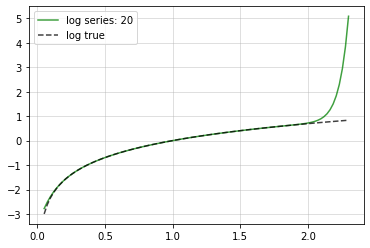

In [36]:
X = np.linspace(0.05, 2.3, 100)
plt.plot(X, f2(X-1), label="log series: {}".format(SERIES_DEG), color="g", alpha=0.75)
plt.plot(X, np.log(X), '--', label="log true", color="k", alpha=0.75)
plt.legend()
plt.grid(alpha=0.5)
plt.show()

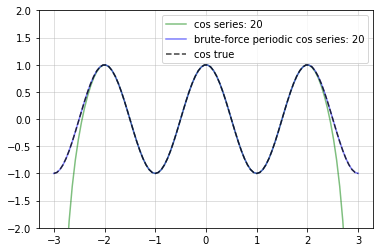

In [42]:
X = np.linspace(-3, 3, 100)
plt.plot(X, f4(X* np.pi), label="cos series: {}".format(SERIES_DEG), color="g", alpha=0.5)
plt.plot(X, u_cos(X* np.pi), label="brute-force periodic cos series: {}".format(SERIES_DEG), color="b", alpha=0.5)
plt.plot(X, np.cos(X* np.pi), '--', label="cos true", color="k", alpha=0.75)
plt.legend()
plt.grid(alpha=0.5)
plt.ylim(-2, 2)
plt.show()

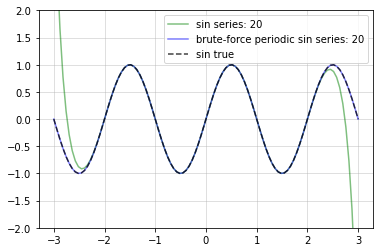

In [44]:
X = np.linspace(-3, 3, 100)
plt.plot(X, f3(X* np.pi), label="sin series: {}".format(SERIES_DEG), color="g", alpha=0.5)
plt.plot(X, u_sin(X* np.pi), label="brute-force periodic sin series: {}".format(SERIES_DEG), color="b", alpha=0.5)
plt.plot(X, np.sin(X* np.pi), '--', label="sin true", color="k", alpha=0.75)
plt.legend()
plt.grid(alpha=0.5)
plt.ylim(-2, 2)
plt.show()

Ожидаемо выглядит график $\\log_{10}$ ошибки:

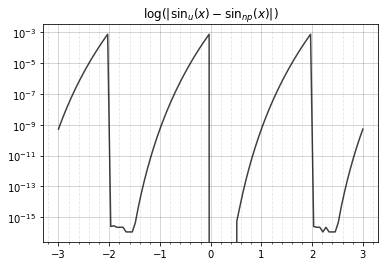

In [94]:
X = np.linspace(-3, 3, 100)
err = np.abs(u_sin(X* np.pi)-np.sin(X* np.pi))
fig, ax = plt.subplots()
plt.plot(X, err, color="k", alpha=0.75)
ax.set_yscale('log')
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
plt.title("$\\log(|\\sin_u(x) - \\sin_{np}(x)|)$")
plt.show()

## Как (возможно) подразумевалось вычисление

In [112]:
def u2_cos(x):
    def get_next(x0, n, n_f):
        return x0 + (-1)**(n / 2) * x**n / n_f
    
    x0  = 1
    n   = 2
    n_f = 2
    x   = x % (2 * np.pi)
    
    while x0 != get_next(x0, n, n_f):
        x0    = get_next(x0, n, n_f)
        n_f  *= (n + 1) * (n + 2)
        n    += 2

    return x0

In [113]:
print(u2_cos(2))
print(np.cos(2))
print("log10|cos_np - cos_u2| = {:.2f}".format(np.log10(np.abs(np.cos(2)-u2_cos(2)))))

-0.41614683654714246
-0.4161468365471424
log10|cos_np - cos_u2| = -16.26


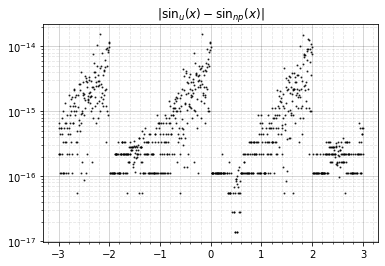

In [120]:
X   = np.linspace(-3, 3, 1000)
yu  = [u2_cos(x * np.pi) for x in X]
err = np.abs(yu-np.cos(X* np.pi))

fig, ax = plt.subplots()
plt.scatter(X, err, color="k", alpha=0.75, s=1)
ax.set_yscale('log')
ax.minorticks_on()
ax.grid(b=True, which='major', color='k', linestyle='-', alpha=0.2)
ax.grid(b=True, which='minor', color='k', linestyle='--', alpha=0.1)
plt.title("$|\\sin_u(x) - \\sin_{np}(x)|$")
plt.show()

Судя по уплотнению в районе $10^{-16}$ делаем вывод о соответствующем машинном $\epsilon$.

# Задача 3

Численно оценим $p$ норму.

In [215]:
p = 3; #p-норма
n = 3;
m = 3;
M = np.array([[0, 2, 10], [4, 5, 0], [2,4,8]])

In [306]:
get_p_vnorm(np.random.random(10), 3)

1.5572824443635216

In [307]:
def get_p_vnorm(v, p): 
    # p-норма вектора
    return np.power(np.sum(np.abs(v)**p, axis=0), 1/p)

def get_p_mnorm(M, p, N=10000):
    # p-норма матрицы
    vs = np.random.uniform(-1, 1, (m, N)) # генерируем случайные вектора
    vs = vs/get_p_vnorm(vs, p)               # нормируем их: p-норма=1
    return np.max(get_p_vnorm(M@vs, p))

## Проверка

Проверим, что вычисление асимптотически приходит к некоторой константе при увеличение N.

In [236]:
from scipy import interpolate

In [315]:
xs = []
ys = []
for i in range(50, 10000, 50):
    ys.append(get_p_mnorm(M, 3, i))
    xs.append(i)

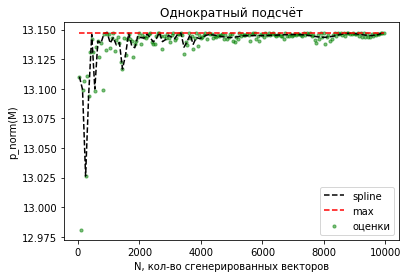

In [316]:
tck,u     = interpolate.splprep([xs,ys], s =1e-3)
xnew,ynew = interpolate.splev( np.linspace( 0, 1, 100 ), tck,der = 0)

plt.scatter(xs, ys, color="g", s=10, alpha=0.5,label="оценки")
plt.plot(xnew, ynew, "--", color="k", label="spline")
plt.plot(xs, np.max(ys)*np.ones(len(xs)), "--", label="max", color="r")
plt.legend()
plt.title("Однократный подсчёт")
plt.xlabel("N, кол-во сгенерированных векторов")
plt.ylabel("p_norm(M)")
plt.show()

In [317]:
rep = 20;
xs2 = []
ys2 = []
for i in range(50, 10000, 100):
    val = 0
    for j in range(rep):
        val += get_p_mnorm(M, 3, i)
        
    ys2.append(val/rep)
    xs2.append(i)

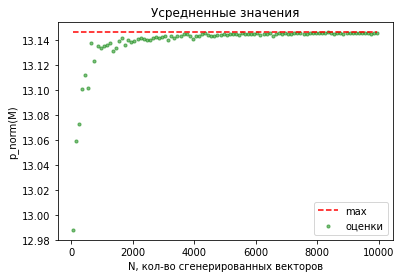

In [329]:
plt.scatter(xs2, ys2, color="g", s=10, alpha=0.5,label="оценки")
plt.plot(xs2, np.max(ys2)*np.ones(len(xs2)), "--", label="max", color="r")
plt.legend()
plt.title("Усредненные значения")
plt.xlabel("N, кол-во сгенерированных векторов")
plt.ylabel("p_norm(M)")
plt.show()

## Аналитическое получение L1 и L2

In [349]:
def get_Linf(A):
    return np.max(np.sum(np.abs(A), axis=1))

def get_L2(A):
    return (np.max(np.linalg.eigvals(A.T @ A)))**0.5

def get_L1(A):
    return np.max(np.sum(np.abs(A), axis=0))

In [351]:
N = int(1e7)
print("      аналит.  |   числ.    ")
print("L1 | {:4f} | {:4f}".format(get_L1(M), get_p_mnorm(M, 1, N)))
print("L2 | {:4f} | {:4f}".format(get_L2(M), get_p_mnorm(M, 2, N)))
print("L3 |           | {:4f}".format(get_p_mnorm(M, 3, N)))

      аналит.  |   числ.    
L1 | 18.000000 | 17.993224
L2 | 13.684377 | 13.684376
L3 |           | 13.147257


In [357]:
# кстати
print("L_inf = {:4f} \nL_120 = {:4f}".format(get_Linf(M), get_p_mnorm(M, 120, N)))

L_inf = 14.000000 
L_120 = 13.889059


Посмотрим на L1 сходимость:

In [330]:
rep = 20;
xs3 = []
ys3 = []
for i in range(50, 10000, 100):
    val = 0
    for j in range(rep):
        val += get_p_mnorm(M, 1, i)
        
    ys3.append(val/rep)
    xs3.append(i)

Посмотрим на L2 сходимость:

In [334]:
rep = 20;
xs4 = []
ys4 = []
for i in range(50, 10000, 100):
    val = 0
    for j in range(rep):
        val += get_p_mnorm(M, 2, i)
        
    ys4.append(val/rep)
    xs4.append(i)

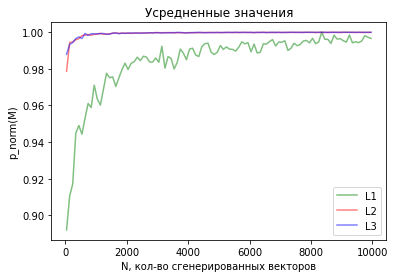

In [337]:
L1 = np.max(ys3)
L2 = np.max(ys4)
L3 = np.max(ys2)

x1 = xs3; y1 = ys3/L1; # простите
x2 = xs4; y2 = ys4/L2; # простите
x3 = xs2; y3 = ys2/L3; # простите

plt.plot(x1, y1, color="g", alpha=0.5,label="L1")
plt.plot(x2, y2, color="r", alpha=0.5,label="L2")
plt.plot(x3, y3, color="b", alpha=0.5,label="L3")

plt.legend()
plt.title("Усредненные значения")
plt.xlabel("N, кол-во сгенерированных векторов")
plt.ylabel("p_norm(M)")
plt.show()

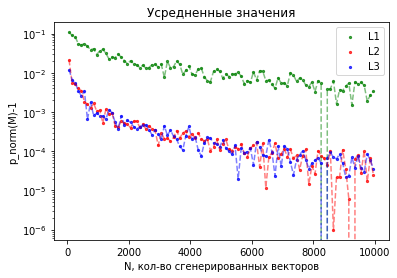

In [343]:
plt.scatter(x1, np.abs(y1-1), color="g", alpha=0.75,label="L1", s=5)
plt.plot(x1, np.abs(y1-1), "--", color="g", alpha=0.5)

plt.scatter(x2, np.abs(y2-1), color="r", alpha=0.75,label="L2", s=5)
plt.plot(x2, np.abs(y2-1), "--", color="r", alpha=0.5)

plt.scatter(x3, np.abs(y3-1), color="b", alpha=0.75,label="L3", s=5)
plt.plot(x3, np.abs(y3-1), "--", color="b", alpha=0.5)


plt.yscale("log")
plt.legend()
plt.title("Усредненные значения")
plt.xlabel("N, кол-во сгенерированных векторов")
plt.ylabel("p_norm(M)-1")
plt.show()

## Число обусловленности

In [402]:
M = np.array([[0, 2, 10], [4, 5, 0], [2,4,8]])

In [407]:
def GetMU(M):
    invM = np.linalg.inv(M)
    return np.array([get_L1(M) * get_L1(invM), 
            get_L2(M) * get_L2(invM), 
            get_Linf(M) * get_Linf(invM)])

In [476]:
rep = 10000
dim = 5;

M = (np.random.random((dim, dim))-1/2)*2
ans1 = GetMU(M)
for i in range(rep):
    M = np.random.random((dim, dim))
    ans1 = np.vstack([ans1, GetMU(M)])
ans1.shape

(10001, 3)

In [475]:
rep = 10000
dim = 50;

M = (np.random.random((dim, dim))-1/2)*2
ans2 = GetMU(M)
for i in range(rep):
    M = np.random.random((dim, dim))
    ans2 = np.vstack([ans2, GetMU(M)])
ans2.shape

(10001, 3)

Посмотрим на гистограмму log чисел обусловленности.

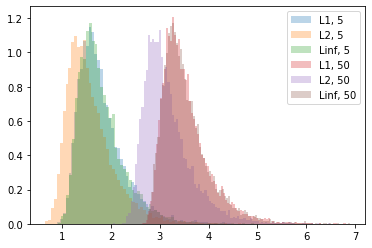

In [477]:
data1 = np.log10(ans1)
data2 = np.log10(ans2)
nbins = 100

plt.hist(data1[:, 0], bins=nbins, alpha=0.3, label="L1, 5", density=True)
plt.hist(data1[:, 1], bins=nbins, alpha=0.3, label="L2, 5", density=True)
plt.hist(data1[:, 2], bins=nbins, alpha=0.3, label="Linf, 5", density=True)

plt.hist(data2[:, 0], bins=nbins, alpha=0.3, label="L1, 50", density=True)
plt.hist(data2[:, 1], bins=nbins, alpha=0.3, label="L2, 50", density=True)
plt.hist(data2[:, 2], bins=nbins, alpha=0.3, label="Linf, 50", density=True)


plt.legend()
plt.show()

# Задача 4

Реализовать метод Гаусса приведения матрицы к ступенчатому виду. Реализовать функцию вычисления ранга матрицы. Сгенерировать вырожденные матрицы различных рангов и размеров и проверить алгоритм.

In [566]:
def gauss2ladder(M):
    M = M.astype("float64")
    n, m = M.shape
    step = 0
    shift = 0

    for i in range(m):
        # берем максимальный элемент
        if step < n:
            i_mnz = step+np.argmax(np.abs(M[step:, step+shift]))
        else: continue

#         print(i_mnz)
    
        if M[:, step+shift][i_mnz] != 0:
            M[[step, i_mnz]] = M[[i_mnz, step]]
        else:
            shift += 1
            continue
        
#         print(np.round(M, 2))

        for j in range(step + 1, n):
            M[j] -=  M[step] / M[step, i] * M[j, i]
        step += 1
        
#         print(np.round(M, 2), end="\n\n")

    return M

In [530]:
def get_rang(M):
    rang = np.sum(np.abs(gauss2ladder(M)), 1).nonzero()[0].shape[0]
    return rang

## Проверка

In [531]:
M = np.array([[0, 2, 10], [4, 5, 0], [2,4,8]])
print("M:")
print(M)
print("\nЛестничный вид M:")
print(gauss2ladder(M))

M:
[[ 0  2 10]
 [ 4  5  0]
 [ 2  4  8]]

Лестничный вид M:
[[ 4.   5.   0. ]
 [ 0.   2.  10. ]
 [ 0.   0.   0.5]]


Найдём ранг

In [532]:
M = np.array([[0, 2, 10], [4, 5, 0], [2,4,8], [4, 5, 0], [2,4,8]])
Mlad = gauss2ladder(M)
print("M:")
print(M)
print("\nЛестничный вид M:")
print(Mlad)
print("\nранг M:", get_rang(M))

M:
[[ 0  2 10]
 [ 4  5  0]
 [ 2  4  8]
 [ 4  5  0]
 [ 2  4  8]]

Лестничный вид M:
[[ 4.   5.   0. ]
 [ 0.   2.  10. ]
 [ 0.   0.   0.5]
 [ 0.   0.   0. ]
 [ 0.   0.   0. ]]

ранг M: 3


Проверим:

In [533]:
gen = mat_gen(-2, 2)
get_rang(gen.lad(3, 2))

2

In [534]:
gen = mat_gen(-20, 4)
get_rang(gen.lad(3, 2))

2

# Задача 5

In [544]:
def get_gauss_sol(M, f):
    M = M.astype("float64")
    f = f.astype("float64")
    
    f = f.reshape(1, -1)
    n = f.shape[1]
    
    x = np.zeros(n)
    
    if get_rang(M) != n:
        return "err: вырожденная матрица"
    
    Mf = np.concatenate((M, f.reshape(n, 1)), axis=1)
    Mf = gauss2ladder(Mf)
    
    for i in range(n-1, -1, -1):
        tmp = 0.
        
        for j in range(i + 1, n):
            tmp += x[j] * Mf[i, j]
    
        x[i] = (Mf[i, n] - tmp) / Mf[i, i]
    return x

In [567]:
N = np.array(
    [[2, 2, 4],
     [0, 0 ,1],
     [2, 2, 10]]);
M = np.array(
    [[1, 2, 4],
     [4, 0 ,1],
     [5, 2, 10]]);
f = np.array([1, 2, 3]);
print(gauss2ladder(N))
print(gauss2ladder(M))

[[2. 2. 4.]
 [0. 0. 6.]
 [0. 0. 0.]]
[[ 5.   2.  10. ]
 [ 0.  -1.6 -7. ]
 [ 0.   0.  -5. ]]


In [573]:
M = np.array(
    [[1, 2, 4],
     [4, 0 ,1],
     [5, 2, 10]]);
f = np.array([1, 2, 4]);

ans = get_gauss_sol(M, f)
print("ans:  ", ans)
print("M@ans:", M@ans)

ans:   [ 0.45  -0.125  0.2  ]
M@ans: [1. 2. 4.]


Прямой ход метода Гаусса требует $O(n^3)$ операций, обратный: $O(n^2)$
$$O(n^3 + n^2) = O(n^3),$$
что и говорит об асимптотике.

# Задача 6

In [607]:
N = 50
A = get_rand_mat((N, N))
print("rg:", get_rang(A))
print("det: {:.2e}".format(np.linalg.det(A)))
print("число обусловленности = {:.2f}".format(get_L2(A) * get_L2(np.linalg.inv(A))))

rg: 50
det: -8.59e+32
число обусловленности = 2101.59


In [608]:
f = np.ones(N)
np_sol = np.linalg.solve(A, f)
u_sol = get_gauss_sol(A, f)
print("diff: {:.2e}".format(np.sqrt(np.sum(np.abs(u_sol - np_sol)**2))))

diff: 7.88e-12


In [609]:
vs = []
diffs = []

for i in range(500):
    pert = np.random.random(N)/100
    fp = np.ones(N) + pert
    
    np_sol = np.linalg.solve(A, f)
    u_sol = get_gauss_sol(A, f)
    
    u_sol_p = get_gauss_sol(A, fp)
    
    diffs.append(np.sqrt(np.sum(np.abs(u_sol - u_sol_p)**2)))
    vs.append(np.sqrt(np.sum(np.abs(u_sol - np_sol)**2)))

In [610]:
# ожидаемые отклонения
1/100 * get_L2(A) * get_L2(np.linalg.inv(A))

21.015866818619113

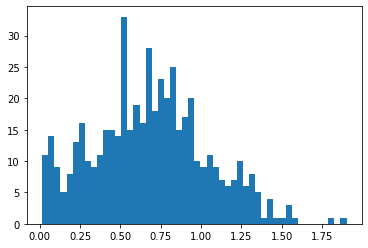

In [611]:
plt.hist(diffs, bins=50)
plt.show()

Больще число обусловленности $\Rightarrow$ больше возмущение.

## Численная оценка числа обусловленности

In [656]:
N = 50
A = get_rand_mat((N, N))
f = np.ones(N)
print("rg:", get_rang(A))
print("det: {:.2e}".format(np.linalg.det(A)))
print("число обусловленности = {:.2f}".format(get_L2(A) * get_L2(np.linalg.inv(A))))

rg: 50
det: -4.49e+33
число обусловленности = 3376.73


In [657]:
vs = []
rep = 100
eps_list = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1];

for eps in eps_list:
    val = 0;
    for i in range(rep):
        pert = np.random.random(N) * eps
        fp = np.ones(N) + pert
        
        u_sol = get_gauss_sol(A, f)
        u_sol_p = get_gauss_sol(A, fp)
        
        val += np.linalg.norm(u_sol_p-u_sol)/rep
    vs.append(val)

In [658]:
est = [vs[i]/eps_list[i] for i in range(len(eps_list))]
est

[47.45039741902817,
 49.49382736733809,
 51.246905200090886,
 55.43427304381988,
 47.74290477561499,
 48.94702502368435]

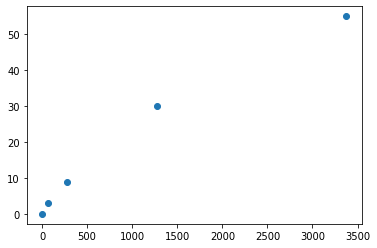

In [662]:
nums = [0, 70.1, 274.78, 1275.12, 3376.73]
ests = [0, 3, 9, 30, 55]
plt.scatter(nums, ests)
plt.show()

In [665]:
from scipy import stats

In [669]:
# корреляция пирсона оценки числа обусловленности и числа обусловленности
stats.pearsonr(nums, ests)[0]

0.9859240079357705